### Total students who sat per year and visualize using a line graph

In [204]:
colm = ['District_Name', 'SCHOOL', 'Gender', '2011_Total',
       '2012_Total', '2013_Total','2014_Total','2015_Total']
dfs = dfc.loc[:, colm]
dfs

,District_Name,SCHOOL,Gender,2011_Total,2012_Total,2013_Total,2014_Total,2015_Total
0,AMUDAT,POKOT_SECONDARY_SCHOOL,FEMALE,0.0,3.0,8.0,2.0,1.0
1,AMUDAT,POKOT_SECONDARY_SCHOOL,MALE,0.0,8.0,14.0,9.0,4.0
3,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,FEMALE,0.0,0.0,0.0,0.0,14.0
4,PADER,ARCHBP.FLYNN_SECONDARY_SCHOOL,MALE,0.0,0.0,0.0,0.0,22.0
5,PADER,PADER_TOWN_HALL_LAGWAI_SEED_SS,FEMALE,3.0,4.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...
3909,KIRUHURA,SEDES_SAPIENTIAE_ACADEMIAE_SS,FEMALE,0.0,0.0,0.0,3.0,10.0
3910,KIRUHURA,SEDES_SAPIENTIAE_ACADEMIAE_SS,MALE,0.0,0.0,0.0,9.0,11.0
3911,KIRUHURA,"ST.CATHERINE_GIRLS_SCHOOL,KAZO",FEMALE,0.0,12.0,44.0,19.0,11.0
3912,KIRUHURA,"UNIVERSAL_SECONDARY_SCHOOL,NYABUSHOZI",FEMALE,6.0,12.0,40.0,0.0,5.0


In [205]:
#TOTAL STUDENTS

# Filter out the 'Total' rows
dfs_filtered = dfs[dfs['Gender'] != 'Total']

# Group by 'Gender' and calculate the sum for each year
gender = dfs_filtered.groupby('Gender', as_index=False).sum(numeric_only=True)

# Calculate the total for each year
year_totals = gender.drop('Gender', axis=1).sum()

# Create total rows
total_females = {'Gender': 'TOTAL STUDENTS'}
total_females.update(year_totals)

# Create a DataFrame for total rows
total_df = pd.DataFrame([total_females])

# Concatenate the total rows to the 'gender' DataFrame
gender = pd.concat([gender, total_df], ignore_index=True)

print(gender)

           Gender  2011_Total  2012_Total  2013_Total  2014_Total  2015_Total
0          FEMALE     39934.0     41710.0     87858.0     41397.0     38641.0
1            MALE     57565.0     63056.0    130612.0     60459.0     56161.0
2  TOTAL STUDENTS     97499.0    104766.0    218470.0    101856.0     94802.0


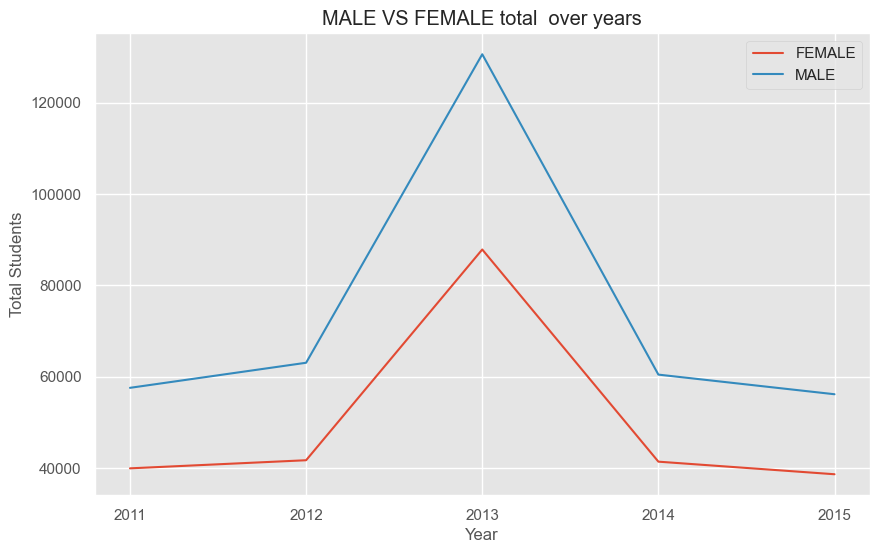

In [206]:
#Visualize with a line graph
# Extract the years from column names
years = [col.split('_')[0] for col in gender.columns if col != 'Gender']

# Plotting
plt.figure(figsize=(10, 6))
for gender_label in gender['Gender']:
    if gender_label != 'TOTAL STUDENTS':
        # Use iloc to select columns by index instead of column names
        plt.plot(years, gender[gender['Gender'] == gender_label].iloc[:, 1:].values.flatten(), label=gender_label)

plt.xlabel('Year')
plt.ylabel('Total Students')
plt.title('MALE VS FEMALE total  over years')
plt.legend()
plt.grid(True)
plt.show()

# Which year had the best performance

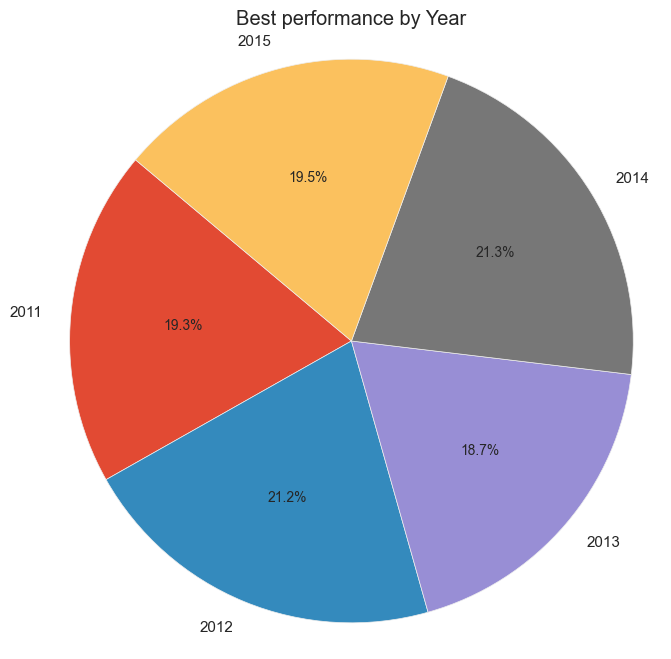

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the percentage point columns and their corresponding weights for each year
years_columns = {
    2011: ['%0-5_Points', '%6-10_Points', '%11-15_Points', '%16-20_Points', '%21-25_Points'],
    2012: ['%0-5_Points.1', '%6-10_Points.1', '%11-15_Points.1', '%16-20_Points.1', '%21-25_Points.1'],
    2013: ['%0-5_Points.2', '%6-10_Points.2', '%11-15_Points.2', '%16-20_Points.2'],
    2014: ['%0-5_Points.3', '%6-10_Points.3', '%11-15_Points.3', '%16-20_Points.3'],
    2015: ['%0-5_Points.4', '%6-10_Points.4', '%11-15_Points.4', '%16-20_Points.4']
}

# Define the weights for each percentage point range
weight_points = [0.05, 0.1, 0.15, 0.2, 0.5]

# Create a new DataFrame to store the results
df_weighted_scores = df_all[['District_Name', 'SCHOOL', 'Gender']].copy()

# Calculate the weighted score for each year and add to the new DataFrame
for year, columns in years_columns.items():
    current_weight_points = weight_points[:len(columns)]
    df_weighted_scores[f'{year}_Weighted_Score'] = df_all[columns].dot(current_weight_points).div(100).round(2)

# Calculate the total weighted score for each year
year_total_scores = {}
for year in years_columns.keys():
    year_total_scores[year] = df_weighted_scores[f'{year}_Weighted_Score'].sum()

# Create a pie chart to visualize the distribution of total weighted scores for each year
plt.figure(figsize=(8, 8))
plt.pie(year_total_scores.values(), labels=year_total_scores.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Best performance by Year')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()
